In [19]:
# Script Name: EDA Analysis on the Datasets
# Author: Rahul Kumar
# Date: 11/3/22
# Description: Gain some insights on the dataset

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [20]:
# Strings for using in writing of files

filepath = '../../UNSW-PROJECT-DATA/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
    
images = 'images/' #My folder specific image folder

csv = '.csv'
xlsx = '.xlsx'

In [21]:
# c_file = 'combined'
# c_file = 'combined_fd_Avg'
c_file = 'demand_pv_temp_forecast_timefeatures_hols'

data = pd.read_csv(filepath+c_file+csv)
data = data.drop(data.columns[0], axis=1)

In [22]:
data.head()

,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY
0,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
1,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
2,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
3,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True
4,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True


In [17]:
data.shape

(726195, 16)

In [5]:
data.info() # Date time objects arent date time objects

data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['SUNRISE'] = pd.to_datetime(data['SUNRISE'])
data['SUNSET'] = pd.to_datetime(data['SUNSET'])

#adding month name
data['Month Name'] = data['DATETIME'].dt.month_name()

print('\n===================================================================================================\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726195 entries, 0 to 726194
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATETIME        726195 non-null  object 
 1   TOTALDEMAND     726195 non-null  float64
 2   POWER           212514 non-null  float64
 3   LOCATION        726195 non-null  object 
 4   TEMPERATURE     726183 non-null  float64
 5   FORECASTDEMAND  417844 non-null  float64
 6   Weekday         726195 non-null  object 
 7   Quarter         726195 non-null  int64  
 8   Month           726195 non-null  int64  
 9   Season          726195 non-null  object 
 10  Day             726195 non-null  int64  
 11  Year            726195 non-null  int64  
 12  SUNRISE         726195 non-null  object 
 13  SUNSET          726195 non-null  object 
 14  DAYTYPE         726195 non-null  object 
 15  HOLIDAY         726195 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(7)
memory usage

In [6]:
data.head()

,DATETIME,TOTALDEMAND,POWER,LOCATION,TEMPERATURE,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,Month Name
0,2010-01-01 00:00:00,8038.00,NaN,Bankstown,23.1,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,January
1,2010-01-01 00:30:00,7809.31,NaN,Bankstown,22.9,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,January
2,2010-01-01 01:00:00,7483.69,NaN,Bankstown,22.6,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,January
3,2010-01-01 01:30:00,7117.23,NaN,Bankstown,22.5,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,January
4,2010-01-01 02:00:00,6812.03,NaN,Bankstown,22.5,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,January


In [7]:
data.describe()

,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,Year
count,726195.000000,212514.000000,726183.000000,417844.000000,726195.000000,726195.000000,726195.000000,726195.000000
mean,5150.459706,314.059966,18.750729,5996.960031,2.489187,6.463139,15.694263,2015.431065
std,2695.260017,478.144853,6.010580,2708.381711,1.125204,3.476231,8.795404,3.148891
min,21.890000,0.000000,-1.300000,191.467609,1.000000,1.000000,1.000000,2010.000000
25%,1861.545000,0.000000,14.400000,4568.020691,1.000000,3.000000,8.000000,2013.000000
50%,5591.150000,3.852000,19.000000,6411.130926,2.000000,6.000000,16.000000,2016.000000
75%,7017.870000,525.308250,23.000000,8006.319180,3.000000,9.000000,23.000000,2018.000000
max,14579.860000,2565.377000,44.700000,14601.171964,4.000000,12.000000,31.000000,2021.000000


In [10]:
data.isnull().sum()

STATE              0
DATETIME           0
TOTALDEMAND    56756
LOCATION       64643
TEMPERATURE    64643
Weekday            0
Quarter            0
Month              0
Season             0
Day                0
Year               0
SUNRISE            0
SUNSET             0
DAYTYPE            0
dtype: int64

In [9]:
data.shape

(726195, 17)

In [10]:
data.nunique()

DATETIME          196513
TOTALDEMAND       445470
POWER             104430
LOCATION               4
TEMPERATURE          448
FORECASTDEMAND    417724
Weekday                7
Quarter                4
Month                 12
Season                 4
Day                   31
Year                  12
SUNRISE            15028
SUNSET             15031
DAYTYPE                2
HOLIDAY                2
Month Name            12
dtype: int64

In [11]:
data.columns

Index(['DATETIME', 'TOTALDEMAND', 'POWER', 'LOCATION', 'TEMPERATURE',
       'FORECASTDEMAND', 'Weekday', 'Quarter', 'Month', 'Season', 'Day',
       'Year', 'SUNRISE', 'SUNSET', 'DAYTYPE', 'HOLIDAY', 'Month Name'],
      dtype='object')

In [12]:
data.corr()

,TOTALDEMAND,POWER,TEMPERATURE,FORECASTDEMAND,Quarter,Month,Day,Year,HOLIDAY
TOTALDEMAND,1.000000,0.123720,-0.078421,0.997951,-0.040550,-0.039208,0.001219,-0.035795,-0.032148
POWER,0.123720,1.000000,0.460601,0.121880,0.033472,0.033594,0.000960,0.150739,0.010130
TEMPERATURE,-0.078421,0.460601,1.000000,-0.089073,-0.133926,-0.130122,-0.015606,0.016022,0.053460
FORECASTDEMAND,0.997951,0.121880,-0.089073,1.000000,-0.034265,-0.032331,0.004548,-0.493921,-0.042293
Quarter,-0.040550,0.033472,-0.133926,-0.034265,1.000000,0.971859,0.017353,-0.055553,-0.035646
Month,-0.039208,0.033594,-0.130122,-0.032331,0.971859,1.000000,0.014416,-0.056232,-0.045374
Day,0.001219,0.000960,-0.015606,0.004548,0.017353,0.014416,1.000000,-0.007192,0.014317
Year,-0.035795,0.150739,0.016022,-0.493921,-0.055553,-0.056232,-0.007192,1.000000,0.000348
HOLIDAY,-0.032148,0.010130,0.053460,-0.042293,-0.035646,-0.045374,0.014317,0.000348,1.000000


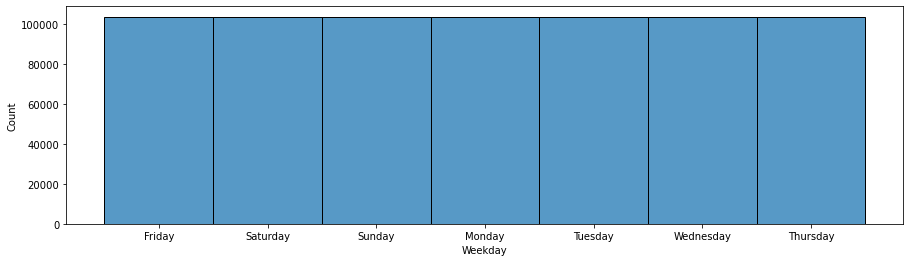

In [13]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Weekday")
plt.show()

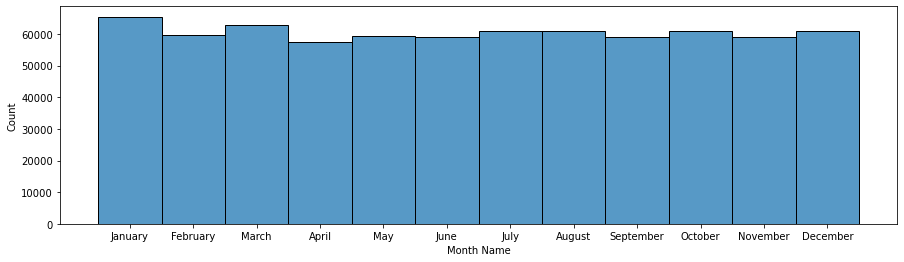

In [14]:
plt.figure(figsize=(15,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Month Name")
plt.show()

In [15]:
# plt.figure(figsize=(10,4)) # this creates a figure 8 inch wide, 4 inch high
# sns.histplot(data, x="STATE")
# plt.show()

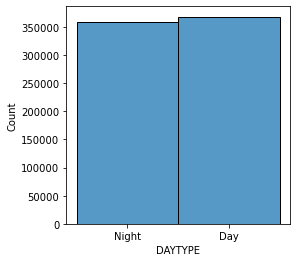

In [16]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="DAYTYPE")
plt.show()

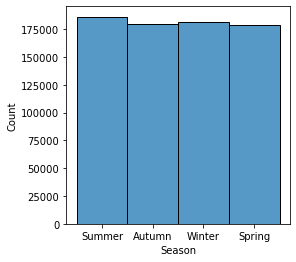

In [17]:
plt.figure(figsize=(4,4)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="Season")
plt.show()

In [23]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
DATETIME,0.00
TOTALDEMAND,0.00
POWER,70.74
LOCATION,0.00
TEMPERATURE,0.00
FORECASTDEMAND,42.46
Weekday,0.00
Quarter,0.00
Month,0.00
Season,0.00


In [19]:
# nsw_df = data.loc[data['STATE'] == 'NSW']
# plt.figure(figsize=(20,20))
# sns.scatterplot(data=nsw_df, x="TEMPERATURE", y="TOTALDEMAND", style = 'DAYTYPE', hue='Season')
# plt.show()

In [20]:
# plt.figure(figsize=(30,8))
# sns.lineplot(data=nsw_df, x="DATETIME", y="TOTALDEMAND")
# plt.show()

In [21]:
# nsw_df_2015 = nsw_df.loc[nsw_df['Year'] == 2015]

In [22]:
# plt.figure(figsize=(30,8))
# sns.lineplot(data=nsw_df_2015, x="DATETIME", y="TOTALDEMAND",hue='DAYTYPE')
# plt.show()

In [23]:
# nsw_yearly_demand = nsw_df.groupby(['Year']).sum()
# nsw_yearly_demand.head()

In [24]:
# plt.figure(figsize=(30,8))
# sns.lineplot(data=nsw_yearly_demand, x="Year", y="TOTALDEMAND")
# plt.show()

In [25]:
# sa_df = data.loc[data['STATE'] == 'SA']

In [26]:
# sa_df.head()

In [27]:
# nsw_df.to_excel('test.xlsx')

In [28]:
# nsw_df.iloc[218585]